In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('SportW.xlsx')

In [3]:
df

,Outlook,Temperature,Humidity,Wind,Played football(yes/no)
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [4]:
label_y = df[df.columns[-1]]

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
label = df.columns[-1]

In [7]:
arr_inputs = []
for pos in range(0,len(df.columns)-1):
    arr_inputs.append(df.columns[pos])

In [8]:
label_encoder_y = LabelEncoder()

In [9]:
X_train = df[arr_inputs]

In [10]:
X_train

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak
5,Rain,Cool,Normal,Strong
6,Overcast,Cool,Normal,Strong
7,Sunny,Mild,High,Weak
8,Sunny,Cool,Normal,Weak
9,Rain,Mild,Normal,Weak


In [11]:
label_y = label_encoder_y.fit_transform(label_y)

In [12]:
label_y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [13]:
X_train

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak
5,Rain,Cool,Normal,Strong
6,Overcast,Cool,Normal,Strong
7,Sunny,Mild,High,Weak
8,Sunny,Cool,Normal,Weak
9,Rain,Mild,Normal,Weak


In [14]:
print(arr_inputs)

['Outlook', 'Temperature', 'Humidity', 'Wind']


In [15]:
diction = {
}

In [16]:
for pos in arr_inputs:
    label_encoder = LabelEncoder()
    X_train[pos] = label_encoder.fit_transform(X_train[pos])
    diction[pos] = label_encoder

/var/folders/dn/bs507yz577q45m4_yg_b4xhw0000gn/T/ipykernel_36281/3631459217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[pos] = label_encoder.fit_transform(X_train[pos])


In [17]:
print(diction)

{'Outlook': LabelEncoder(), 'Temperature': LabelEncoder(), 'Humidity': LabelEncoder(), 'Wind': LabelEncoder()}


In [18]:
X_train

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
from sklearn import tree

In [21]:
df

,Outlook,Temperature,Humidity,Wind,Played football(yes/no)
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [22]:
model = DecisionTreeClassifier(criterion="entropy")

In [23]:
model = model.fit(X_train,label_y)

In [24]:
model

DecisionTreeClassifier(criterion='entropy')

In [25]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  1.50
|   |   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_1 <= 1.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  1.00
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 1



[Text(148.8, 195.696, 'Outlook <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(111.60000000000001, 152.208, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(186.0, 152.208, 'Humidity <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(111.60000000000001, 108.72, 'Outlook <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(74.4, 65.232, 'Wind <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(37.2, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(111.60000000000001, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(148.8, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(260.40000000000003, 108.72, 'Wind <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(223.20000000000002, 65.232, 'Temperature <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(186.0, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(260.40000000000003, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Te

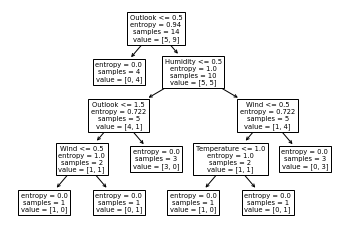

In [26]:
tree.plot_tree(model,feature_names=arr_inputs)

In [27]:
import graphviz

In [28]:
from sklearn.tree import export_graphviz

In [29]:
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=arr_inputs,  
                                class_names=True,
                                filled=True)

In [30]:
graph = graphviz.Source(dot_data, format="png") 

# Binary Tree

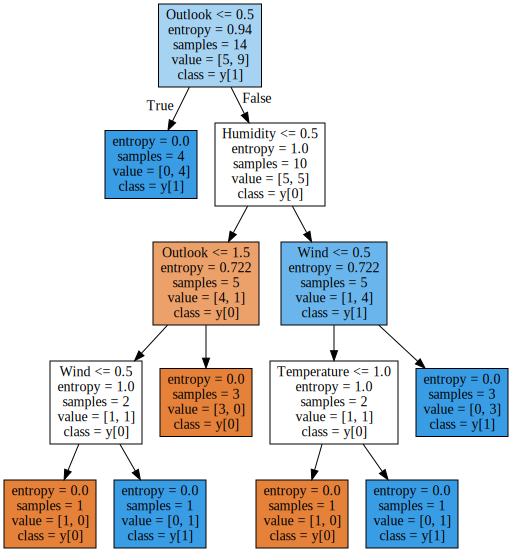

In [31]:
graph

In [32]:
df_split1 = df[(df['Outlook'] == 'Sunny') | (df['Outlook'] == 'Rain')]

In [33]:
df_split1

,Outlook,Temperature,Humidity,Wind,Played football(yes/no)
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes
13,Rain,Mild,High,Strong,No


In [34]:
df_split2_1 = df_split1[df_split1['Humidity'] == 'High']

In [35]:
df_split2_1

,Outlook,Temperature,Humidity,Wind,Played football(yes/no)
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
3,Rain,Mild,High,Weak,Yes
7,Sunny,Mild,High,Weak,No
13,Rain,Mild,High,Strong,No


In [36]:
df_split2_2 = df_split1[df_split1['Humidity'] == 'Normal']

In [37]:
df_split2_2

,Outlook,Temperature,Humidity,Wind,Played football(yes/no)
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes


Since outlook has the highest information gain, that is why it is placed as the root node.

An entropy score of means the node is pure and no further nodes are attached to that node.

This type of tree is a classification tree as it will predict a yes/no, it will not predict a value

The samples are the number of values. For example in the root node, there are 14 values/samples. Then the root node splits into two distinct nodes, which have samnples = 4 and samples = 10 respectively

The first question the decision tree ask is if the outlook is less than 0.5. Based on the result, it either follows the true or the false path.

 The value list tells you how many samples at the given node fall into each category.

The first element of the list shows the number of samples that belong to the y[0] class, the second element of the list shows the number of samples that belong to the y[1] class

The class value shows the prediction a given node will make and it can be determined from the value list. 

Whichever class occurs the most within the node will be selected as the class value.

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
paramters = {
    'criterion': ("gini","entropy")
}

In [40]:
model_grid = DecisionTreeClassifier()

In [41]:
model_grid = model.fit(X_train,label_y)

In [42]:
grid_search = GridSearchCV(model_grid,paramters)

In [43]:
grid_GBR = grid_search.fit(X_train,label_y)

In [44]:
print("The best score across ALL searched params:\n",grid_GBR.best_score_)

The best score across ALL searched params:
 0.8666666666666666


In [45]:
print("The best parameters across ALL searched params:\n",grid_GBR.best_params_)

The best parameters across ALL searched params:
 {'criterion': 'gini'}


In [46]:
print(grid_GBR.cv_results_)

{'mean_fit_time': array([0.00112271, 0.00075564]), 'std_fit_time': array([2.85857374e-04, 9.44402446e-06]), 'mean_score_time': array([0.00065055, 0.00054636]), 'std_score_time': array([9.00869704e-05, 4.74590732e-06]), 'param_criterion': masked_array(data=['gini', 'entropy'],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'criterion': 'gini'}, {'criterion': 'entropy'}], 'split0_test_score': array([0.66666667, 0.66666667]), 'split1_test_score': array([1., 1.]), 'split2_test_score': array([1.        , 0.66666667]), 'split3_test_score': array([0.66666667, 0.66666667]), 'split4_test_score': array([1. , 0.5]), 'mean_test_score': array([0.86666667, 0.7       ]), 'std_test_score': array([0.16329932, 0.16329932]), 'rank_test_score': array([1, 2], dtype=int32)}


In [47]:
df_grid = pd.DataFrame(data = grid_GBR.cv_results_)

In [48]:
df_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001123,0.000286,0.000651,0.000090,gini,{'criterion': 'gini'},0.666667,1.0,1.000000,0.666667,1.0,0.866667,0.163299,1
1,0.000756,0.000009,0.000546,0.000005,entropy,{'criterion': 'entropy'},0.666667,1.0,0.666667,0.666667,0.5,0.700000,0.163299,2


max_depth = The maximum depth that you allow the tree to grow to.

If you increase max_depth, training error will always go down 

If you set max_depth too high, then the decision tree might simply overfit the training data without capturing useful patterns as we would like

But if you set it too low, that is not good as well. You might be giving the decision tree too little flexibility to understand the hidden patterns.

That is why finding the optimum max_depth is extremely useful to finding the model that will give the highest accuracy.